In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import signal,stats,spatial,misc
from obspy.taup import TauPyModel
import time
from IPython import display
import matplotlib.gridspec as gridspec
from obspy.clients.fdsn import Client
from obspy.clients.iris import Client as OldIris_Client
from obspy.core.util import NamedTemporaryFile
import matplotlib.mlab as mlab
import itertools
from obspy import UTCDateTime
from matplotlib.cbook import get_sample_data
from mpl_toolkits.basemap import Basemap

<h3 align="center">Recolhendo as Funções do Receptor</h3>

In [3]:
STA = ['BDCO','BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

BDCO = 0, BPPF = 1 ,BUCO = 2, GENI = 3, GRJU = 4, PRDT = 5, STNS = 6, STSR = 7, TRZN = 8

In [4]:
z = 0

In [5]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

datalistt = []
datalistSt = []
dir_listt = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori'):
    for datafile in files:
        if datafile.endswith('.eqt'):
            datalistt.append(os.path.join(root, datafile))
datalistSt = sorted(datalistt)

In [6]:
a1r = []
a25r = []
for i,j in enumerate(datalistSr):
    if '_1.0' in j:
        a1r.append(j)
    else:
        a25r.append(j)

a1t = []
a25t = []
for i,j in enumerate(datalistSt):
    if '_1.0' in j:
        a1t.append(j)
    else:
        a25t.append(j)

In [7]:
a1r_name = [i.split('/')[9] for i in a1r]
a1t_name = [i.split('/')[9] for i in a1t]
a25r_name = [i.split('/')[9] for i in a25r]
a25t_name = [i.split('/')[9] for i in a25t]

In [8]:
RF_list_r = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r[l].append(j)
            
RF_list_r_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_25[l].append(j)

In [9]:
RF_list_t = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t[l].append(j)
            
RF_list_t_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_25[l].append(j)

<h3 align="center">Separando as Funções do Receptor por Estação</h3>

<h3 align="center">a = 1.0</h3>

In [10]:
RF = []

for i,j in enumerate(RF_list_r[z]):
    RF += op.read(j)

In [11]:
TF = []
for i,j in enumerate(RF_list_t[z]):
    TF += op.read(j)

<h3 align="center">a = 2.5</h3>

In [12]:
RF_25 = []
RF_name_r_25 = []

for i,j in enumerate(RF_list_r_25[z]):
    RF_25 += op.read(j)

In [13]:
TF_25 = []
for i,j in enumerate(RF_list_t_25[z]):
    TF_25 += op.read(j)

<h3 align="center">Plotando as Funções do Receptor</h3>

<h1 align="center">a = 1.0</h1>

In [14]:
RFgcarc = [i.stats.sac.gcarc for i in RF]
RFevdp = [i.stats.sac.evdp for i in RF]
RFbaz = [i.stats.sac.baz for i in RF]
RFRP = [i.stats.sac.user8 for i in RF]

In [15]:
orglisl_BAZ = np.argsort(RFbaz)

In [16]:
RF_list_r_name = [i.split('/'+STA[z]+'/')[1] for i in RF_list_r[z]]

In [17]:
RF_list_r_name_sorted = []
RFbaz_sorted = []
RFRP_sorted = [] 
for i in orglisl_BAZ:
    RF_list_r_name_sorted.append(RF_list_r_name[i])
    RFbaz_sorted.append(RFbaz[i])
    RFRP_sorted.append(RFRP[i])

In [18]:
np.savetxt('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/BAZ_RAY_PARAMETER_list.txt',np.transpose([RF_list_r_name_sorted,RFbaz_sorted,RFRP_sorted]),fmt=['%s','%s','%s'] ,delimiter='   ')

FileNotFoundError: [Errno 2] No such file or directory: '/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/BDCO/BAZ_RAY_PARAMETER_list.txt'

<h2 align="center">RAY PARAMETER</h2>

In [19]:
fator = 100
a = [i*fator for i in RFRP]
a = sorted(a)

FileNotFoundError: [Errno 2] No such file or directory: '/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/BDCO/RF_Ray_Parameter.png'

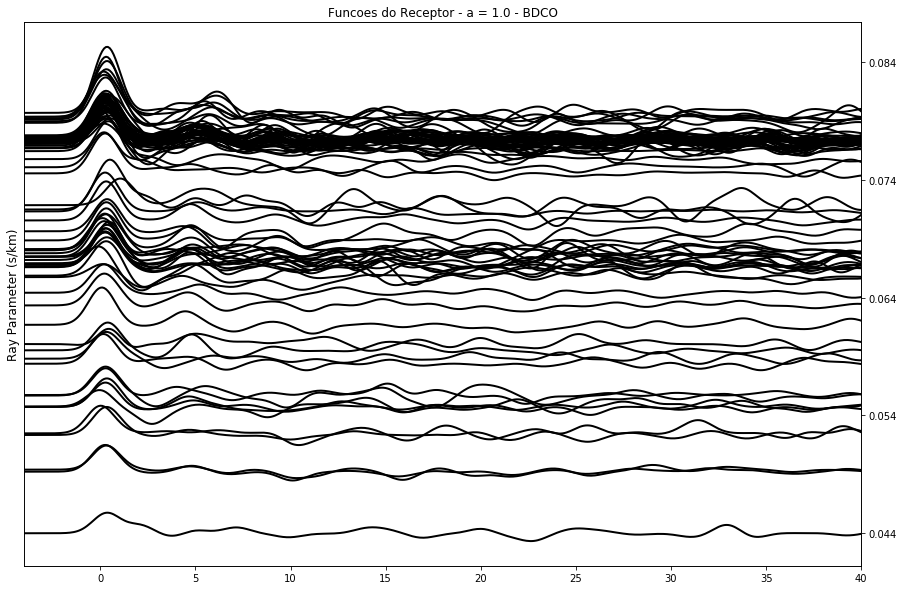

In [20]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax1 = ax.twinx()

def tick_function_BAZ(X):
    V = X/fator
    return ["%.3f" % z for z in V]

for i, j in enumerate(RFRP): 
    ax.plot(RF[i].times()-10,fator*j+RF[i].data,'k',linewidth=2)
    ax.set_title('Funcoes do Receptor - a = 1.0 - '+STA[z])
    ax.set_xlim(-4,40)    
    ax.set_yticks([])
    ax.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    new_tick_locations = np.arange(a[0],a[-1]+1,1)
    ax1.set_ylim(ax.get_ylim())
    ax1.set_yticks(new_tick_locations)
    ax1.set_yticklabels(tick_function_BAZ(new_tick_locations))
    
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/RF_Ray_Parameter.png')
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/RF_Ray_Parameter.png')

<h2 align="center">BAZ</h2>

In [21]:
fator_b = 100
b = [i/fator_b for i in RFbaz]
b = sorted(b)

FileNotFoundError: [Errno 2] No such file or directory: '/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/BDCO/RF_BAZ.png'

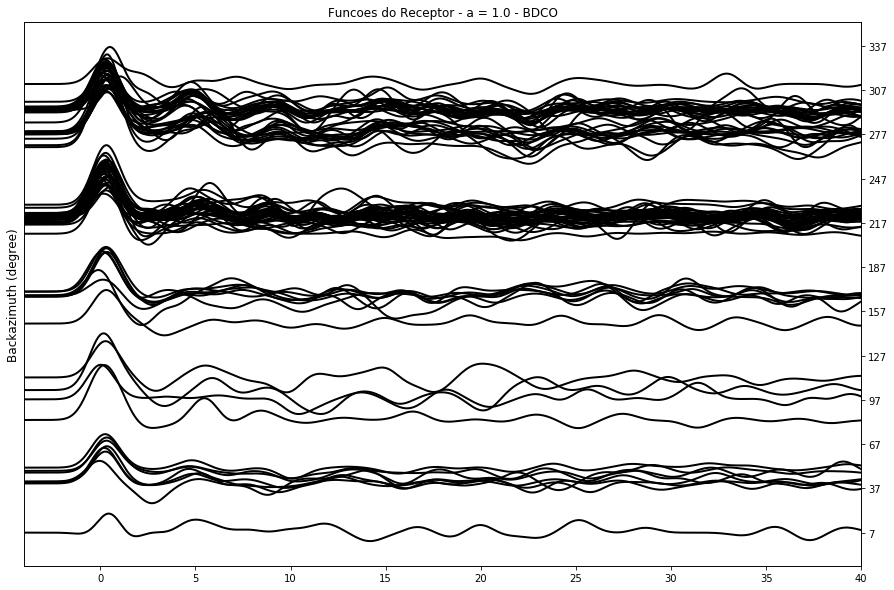

In [22]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax1 = ax.twinx()

def tick_function_BAZ(X):
    V = fator_b*X
    return ["%.0f" % z for z in V]

for i, j in enumerate(RFbaz): 
    ax.plot(RF[i].times()-10,j/fator_b+RF[i].data,'k',linewidth=2)
    ax.set_title('Funcoes do Receptor - a = 1.0 - '+STA[z])
    ax.set_xlim(-4,40)    
    ax.set_yticks([])
    ax.set_ylabel('Backazimuth (degree)',fontsize=12)
    new_tick_locations = np.arange(b[0],b[-1]+0.5,0.3)
    ax1.set_ylim(ax.get_ylim())
    ax1.set_yticks(new_tick_locations)
    ax1.set_yticklabels(tick_function_BAZ(new_tick_locations))

plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/RF_BAZ.png')
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/RF_BAZ.png')

<h3 align="center">Salvando as Funções do Receptor na PASTA JOINT INVERSION</h3>

In [23]:
for i,j in enumerate(RF_list_r[z]):
    shutil.copy2(j,'/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/'+RF_list_r_name[i])

FileNotFoundError: [Errno 2] No such file or directory: '/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/BDCO/BP.BDCO.2015.01.41.05.870000.eqr'



<h1 align="center">a = 2.5</h1>

In [24]:
RFgcarc_25 = [i.stats.sac.gcarc for i in RF_25]
RFevdp_25 = [i.stats.sac.evdp for i in RF_25]
RFbaz_25 = [i.stats.sac.baz for i in RF_25]
RFRP_25 = [i.stats.sac.user8 for i in RF_25]

In [25]:
orglisl_BAZ_25 = np.argsort(RFbaz_25)

In [26]:
RF_list_r_name_25 = [i.split('/'+STA[z]+'/')[1] for i in RF_list_r_25[z]]

In [27]:
RF_list_r_name_25_sorted = []
RFbaz_25_sorted = []
RFRP_25_sorted = [] 
for i in orglisl_BAZ_25:
    RF_list_r_name_25_sorted.append(RF_list_r_name_25[i])
    RFbaz_25_sorted.append(RFbaz_25[i])
    RFRP_25_sorted.append(RFRP_25[i])

In [28]:
np.savetxt('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/BAZ_RAY_PARAMETER_list.txt',np.transpose([RF_list_r_name_25_sorted,RFbaz_25_sorted,RFRP_25_sorted]),fmt=['%s','%s','%s'],delimiter='   ')

FileNotFoundError: [Errno 2] No such file or directory: '/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_2.5/BDCO/BAZ_RAY_PARAMETER_list.txt'

<h2 align="center">RAY PARAMETER</h2>

In [29]:
factor_c = 100
c = [i*factor_c for i in RFRP_25]
c = sorted(c)

FileNotFoundError: [Errno 2] No such file or directory: '/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_2.5/BDCO/RF_Ray_Parameter.png'

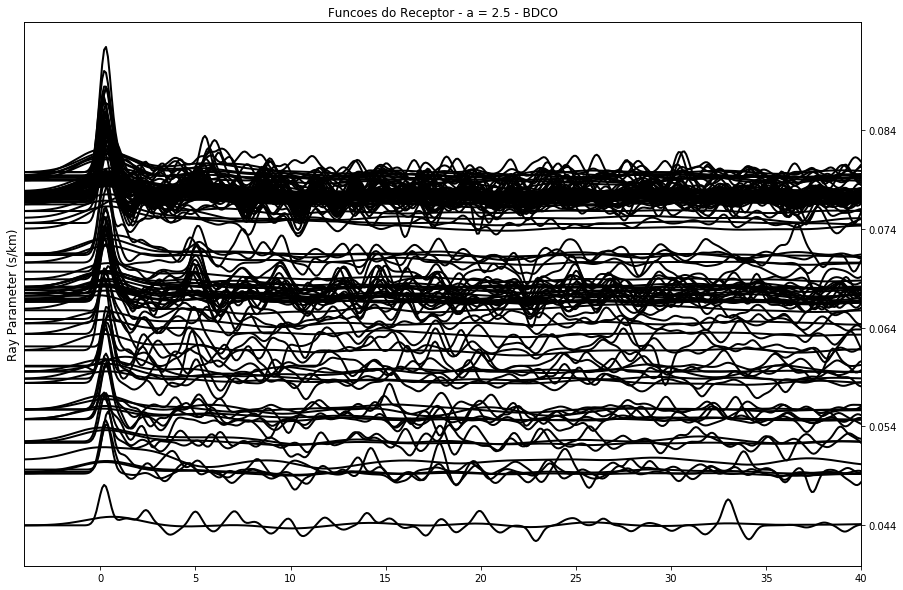

In [30]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax1 = ax.twinx()

def tick_function_BAZ(X):
    V = X/factor_c
    return ["%.3f" % z for z in V]

for i, j in enumerate(RFRP_25): 
    ax.plot(RF_25[i].times()-10,factor_c*j+RF_25[i].data,'k',linewidth=2)
    ax.set_title('Funcoes do Receptor - a = 2.5 - '+STA[z])
    ax.set_xlim(-4,40)    
    ax.set_yticks([])
    ax.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    new_tick_locations = np.arange(c[0],c[-1]+1,1)
    ax1.set_ylim(ax.get_ylim())
    ax1.set_yticks(new_tick_locations)
    ax1.set_yticklabels(tick_function_BAZ(new_tick_locations))

plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/RF_Ray_Parameter.png')
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/RF_Ray_Parameter.png')

<h2 align="center">BAZ</h2>

In [ ]:
fator_c = 100
d = [i/fator_c for i in RFbaz_25]
d = sorted(d)

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax1 = ax.twinx()

def tick_function_BAZ(X):
    V = X*fator_c
    return ["%.0f" % z for z in V]

for i, j in enumerate(RFbaz_25): 
    ax.plot(RF_25[i].times()-10,j/fator_c+RF_25[i].data,'k',linewidth=2)
    ax.set_title('Funcoes do Receptor - a = 2.5 - '+STA[z])
    ax.set_xlim(-4,40)    
    ax.set_yticks([])
    ax.set_ylabel('Backazimuth (degree)',fontsize=12)
    new_tick_locations = np.arange(d[0],d[-1]+0.5,0.3)
    ax1.set_ylim(ax.get_ylim())
    ax1.set_yticks(new_tick_locations)
    ax1.set_yticklabels(tick_function_BAZ(new_tick_locations))
    
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/RF_BAZ.png')
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/RF_BAZ.png')

<h3 align="center">Salvando as Funções do Receptor na PASTA JOINT INVERSION</h3>

In [66]:
for i,j in enumerate(RF_list_r_25[z]):
        shutil.copy2(j,'/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/'+RF_list_r_name_25[i])